# Task#1: Reading Geospatial Data

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = xr.open_dataset('adaptor.mars.internal-1605425455.1752734-20393-5-49fab36f-d06a-432a-b513-ecaa260ebcc8.nc')

## Range of Coordinates

In [3]:
print('Range of Latitude: ',max(df.latitude) - min(df.latitude))
print('Range of Longitude: ',max(df.longitude) - min(df.longitude))
print('Range of Time: ',max(df.time) - min(df.time))

Range of Latitude:  <xarray.DataArray 'latitude' ()>
array(180., dtype=float32)
Range of Longitude:  <xarray.DataArray 'longitude' ()>
array(359.9, dtype=float32)
Range of Time:  <xarray.DataArray 'time' ()>
array(2592000000000000, dtype='timedelta64[ns]')


# Task#2: Cleaning data: Filling NaN Values

To explore and visualise we need to fill NaN values with something meaningful. To fill NaN values the very naive approach is to fill average values. But here in this data averages can be taken in three ways

1. Day & Latitude wise average on specific longitudes
2. Day & Longitude wise average on specific latitudes
3. Latitude & Longitude wise average of a specific day


To select the best average we need get the average of data that has least variance above all three ways. 

#### Why Variance?

Because if something has high variance then most of the values are not near mean of the whole data. That's why it is better to select the least variance data

In [4]:
# Day & Latitude wise average on specific longitudes
print('Average variance of temperature on all days: ',pd.DataFrame(df.t2m.values[:,:,0]).dropna(axis = 1).var(axis = 1).mean())
print('Average variance of temperature on all latitudes ',pd.DataFrame(df.t2m.values[:,:,0]).dropna(axis = 1).var(axis = 0).mean())

# Day & longitude wise average on specific latitudes
print('Average variance of temperature on all days: ',pd.DataFrame(df.t2m.values[:,0,:]).dropna(axis = 1).var(axis = 1).mean())
print('Average variance of temperature on all days: ',pd.DataFrame(df.t2m.values[:,0,:]).dropna(axis = 1).var(axis = 0).mean())

# Latitude & Longitude wise average of a specific day
print('Average variance of temperature on all latitudes: ',pd.DataFrame(df.t2m.values[0,:,:]).dropna(axis = 0).var(axis = 1).mean())
print('Average variance of temperature on all longitudes: ',pd.DataFrame(df.t2m.values[0,:,:]).dropna(axis = 0).var(axis = 0).mean())

Average variance of temperature on all days:  421.5075
Average variance of temperature on all latitudes  5.247876
Average variance of temperature on all days:  nan
Average variance of temperature on all days:  nan
Average variance of temperature on all latitudes:  45.64437
Average variance of temperature on all longitudes:  38.342953


### Result: Based upon above data the least variance we are getting is based on temperatures over latitudes which is justified as latitude is a metric that is highly correlated with temperatures in terms of equator, tropic of cancer, tropic of capricon we classify hot and cold regions.

So we will fill the NaN values with average temperatures taken over latitudes

In [5]:
mean_temperature = np.mean(np.mean(pd.DataFrame(df.t2m.values[:,:,0]).dropna(axis = 1)))

In [6]:
df.t2m.fillna(mean_temperature)

<xarray.DataArray 't2m' (time: 31, latitude: 1801, longitude: 3600)>
array([[[280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
        [280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
        [280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
        ...,
        [241.74368, 241.74368, 241.74368, ..., 241.74368, 241.74368,
         241.74368],
        [241.74222, 241.74222, 241.74222, ..., 241.74222, 241.74222,
         241.74222],
        [241.6848 , 241.6848 , 241.6848 , ..., 241.6848 , 241.6848 ,
         241.6848 ]],

       [[280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
        [280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
        [280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
...
        [248.3075 , 248.3075 , 248.3075 , ..., 248.29718, 248.3016 ,
         248.30602],
        [248.28394, 248.28394, 248.28394, ..., 248.27362, 248.27658,
         248.27951],
        [247.66113, 247.66113, 247.66113, ..., 247.66113, 247.66113,
         247.66113]],

       [[280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
        [280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
        [280.67374, 280.67374, 280.67374, ..., 280.67374, 280.67374,
         280.67374],
        ...,
        [244.32622, 244.32622, 244.32622, ..., 244.32475, 244.32475,
         244.32622],
        [244.31297, 244.31297, 244.31297, ..., 244.3115 , 244.3115 ,
         244.31297],
        [243.94635, 243.94635, 243.94635, ..., 243.94635, 243.94635,
         243.94635]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

## Doing similarly for other variables

In [9]:
# Day & Latitude wise average on specific longitudes
print('Average variance of precipitation on all days: ',pd.DataFrame(df.tp.values[:,:,0]).dropna(axis = 1).var(axis = 1).mean())
print('Average variance of precipitation on all latitudes ',pd.DataFrame(df.tp.values[:,:,0]).dropna(axis = 1).var(axis = 0).mean())

# Day & longitude wise average on specific latitudes
print('Average variance of precipitation on all days: ',pd.DataFrame(df.tp.values[:,0,:]).dropna(axis = 1).var(axis = 1).mean())
print('Average variance of precipitation on all days: ',pd.DataFrame(df.tp.values[:,0,:]).dropna(axis = 1).var(axis = 0).mean())

# Latitude & Longitude wise average of a specific day
print('Average variance of precipitation on all latitudes: ',pd.DataFrame(df.tp.values[0,:,:]).dropna(axis = 0).var(axis = 1).mean())
print('Average variance of precipitation on all longitudes: ',pd.DataFrame(df.tp.values[0,:,:]).dropna(axis = 0).var(axis = 0).mean())

Average variance of precipitation on all days:  3.4207228e-06
Average variance of precipitation on all latitudes  3.280398e-06
Average variance of precipitation on all days:  nan
Average variance of precipitation on all days:  nan
Average variance of precipitation on all latitudes:  2.1941823e-08
Average variance of precipitation on all longitudes:  1.6195319e-08


In [9]:
# pd.DataFrame(df.tp.values[0,:,:])
mean_precipitation = np.mean(np.mean(pd.DataFrame(df.tp.values[:,:,0]).dropna(axis = 1)))
df.tp.fillna(mean_precipitation)

In [11]:
# Day & Latitude wise average on specific longitudes
print('Average variance of Volumetric soil water layer 1  on all days: ',pd.DataFrame(df.swvl1.values[:,:,0]).dropna(axis = 1).var(axis = 1).mean())
print('Average variance of Volumetric soil water layer 1  on all latitudes ',pd.DataFrame(df.swvl1.values[:,:,0]).dropna(axis = 1).var(axis = 0).mean())

# Day & longitude wise average on specific latitudes
print('Average variance of Volumetric soil water layer 1  on all days: ',pd.DataFrame(df.swvl1.values[:,0,:]).dropna(axis = 1).var(axis = 1).mean())
print('Average variance of Volumetric soil water layer 1  on all days: ',pd.DataFrame(df.swvl1.values[:,0,:]).dropna(axis = 1).var(axis = 0).mean())

# Latitude & Longitude wise average of a specific day
print('Average variance of Volumetric soil water layer 1  on all latitudes: ',pd.DataFrame(df.swvl1.values[0,:,:]).dropna(axis = 0).var(axis = 1).mean())
print('Average variance of Volumetric soil water layer 1  on all longitudes: ',pd.DataFrame(df.swvl1.values[0,:,:]).dropna(axis = 0).var(axis = 0).mean())

Average variance of Volumetric soil water layer 1  on all days:  0.022035433
Average variance of Volumetric soil water layer 1  on all latitudes  0.00021567979
Average variance of Volumetric soil water layer 1  on all days:  nan
Average variance of Volumetric soil water layer 1  on all days:  nan
Average variance of Volumetric soil water layer 1  on all latitudes:  0.0040507326
Average variance of Volumetric soil water layer 1  on all longitudes:  0.003553779


In [8]:
mean_volume = np.mean(np.mean(pd.DataFrame(df.swvl1.values[:,:,0]).dropna(axis = 1)))
df.swvl1.fillna(mean_volume)

## Clean data
Created a dictionary of clean data in which the NaN values are filled as least variance average values of all variables 

In [13]:
clean_data = {'t2m':t2m,'tp':tp,'swvl1':swvl1}

## Other methods that could have been used for filling NaN values
Yes there are other better methods to fill NaN values such as
1. K's Nearest Neighbour
2. Inverse Transform Sampling supported with Maximum Likelihood Estimation
3. Generative Adversarial Network(Overkill)


Above written methods are good but all have a higher level of abstraction as compared to average method that we've used. So it is more flexible and recommended to use if we are doing the analysis first time. Yes if the performance will not be satisfactory we can always go to above written methods

# Task#3: Basic statistics of data

In [10]:
swvl1 = df.swvl1.fillna(mean_volume).values
tp = df.tp.fillna(mean_precipitation).values
t2m = df.t2m.fillna(mean_temperature).values
print('Mean of Temperature of air at 2m above the surface: ',np.mean(t2m))
print('Mean of Total precipitation: ',np.mean(tp))
print('Mean of Volumetric soil water layer 1',np.mean(swvl1))
print('Std of Temperature of air at 2m above the surface: ',np.std(t2m))
print('Std of Total precipitation: ',np.std(tp))
print('Std of Volumetric soil water layer 1',np.std(swvl1))
print('Var of Temperature of air at 2m above the surface: ',np.var(t2m))
print('Var of Total precipitation: ',np.var(tp))
print('Var of Volumetric soil water layer 1',np.var(swvl1))

Mean of Temperature of air at 2m above the surface:  276.42633
Mean of Total precipitation:  0.00049326726
Mean of Volumetric soil water layer 1 0.21274704
Std of Temperature of air at 2m above the surface:  14.042591
Std of Total precipitation:  0.001511451
Std of Volumetric soil water layer 1 0.084839724
Var of Temperature of air at 2m above the surface:  197.19437
Var of Total precipitation:  2.284484e-06
Var of Volumetric soil water layer 1 0.007197779


# Task#4: Sequential Colormaps of each data on a random day

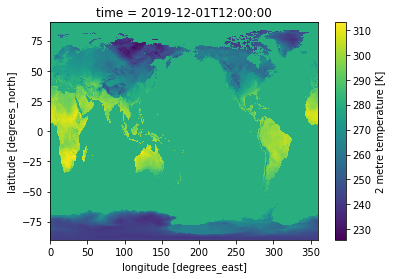

In [10]:
df.t2m.fillna(mean_temperature).isel(time=0).plot()

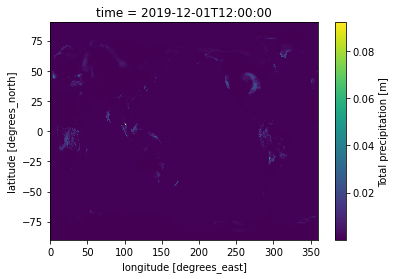

In [13]:
df.tp.fillna(mean_precipitation).isel(time=0).plot()

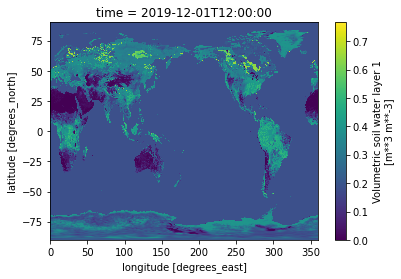

In [14]:
df.swvl1.fillna(mean_volume).isel(time=0).plot()

## Histograms

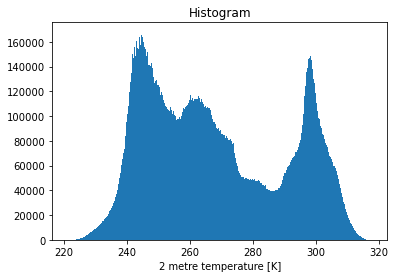

In [91]:
df.t2m.plot.hist(bins = 1000)
plt.show()

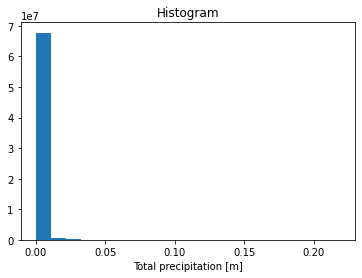

In [21]:
df.tp.plot.hist(bins = 20)
plt.show()

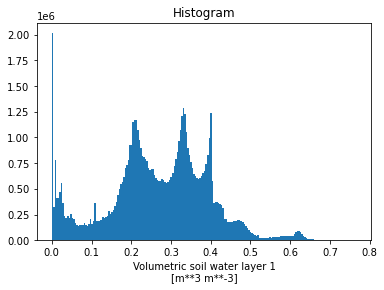

In [100]:
df.swvl1.plot.hist(bins = 200)
plt.show()

## Upscaling the spatial resolution using Linear Interpolation

In [19]:
resolution = 0.05
newlon = np.arange(0, 360, resolution)
newlat = np.arange(-90, 90+resolution, resolution)

In [29]:
data_set_interp = df.interp(latitude=newlat, longitude=newlon)
# Due to memory issues in my windows machine, I can't do this as I am not able to enable overcommit mode

MemoryError: Unable to allocate 1.50 GiB for an array with shape (3601, 111600) and data type float32

## Reducing Skewness of Total Precipitation Data

To reduce skewness we are doing log transformation. Because skewness is due to difference in mean and median but when we take log we smooth out the numbers and make them very near.

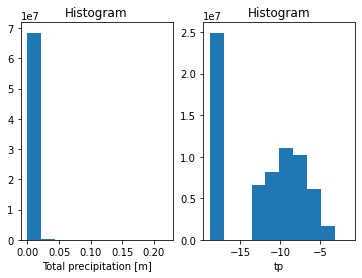

In [31]:
fig, axes = plt.subplots(ncols=2)
df.tp.plot.hist(ax=axes[0],bins = 10)
np.log(df.tp).plot.hist(ax = axes[1],bins = 10)
plt.draw()

Left Histogram: Skewed Non Transformed

Right Histogram: Log Transformed

In the above plot as we can see now the numbers which were very small are now gained some height due to smoothening of log. Taking log also reduced variance that made the distribution more sharp

# Deep Learning for Geospatial Data
### Prediction of Total Precipitation using 2m Temperature & Soil Water Level 1 via Neural Network using Pytorch

In [11]:
import torch
dtype = torch.float
device = torch.device("cpu")

In [12]:
x1 = df.t2m.fillna(mean_temperature)
x2 = df.swvl1.fillna(mean_volume)
x = np.concatenate((x1.values,x2.values),axis = 1)
y = df.tp.fillna(mean_precipitation).values

In [103]:
N, D_in, H, D_out = 1, 3602, 3602, 1801
e = []
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, H, device=device, dtype=dtype, requires_grad=True)
w3 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
lr = 1e-8
for t in range(100):
    y_p = torch.tanh(torch.tanh(torch.Tensor(x[0,:,:].T).mm(w1)).mm(w2)).mm(w3)
    loss = (y_p - torch.Tensor(y[0,:,:].T)).pow(2).sum()
#     print(y_p)
    print(t, loss.item())
    e.append(loss.item())
    w1.retain_grad()
    w2.retain_grad()
    w3.retain_grad()

    
    loss.backward()
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w3 -= lr * w3.grad

        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()              

0 22497161216.0
1 11511728128.0
2 6230021120.0
3 3589238272.0
4 2103306624.0
5 1190465280.0
6 670007168.0
7 387121440.0
8 245998064.0
9 127331080.0
10 69854768.0
11 38326832.0
12 21031256.0
13 11543422.0
14 6338775.0
15 3482968.75
16 1916182.75
17 1056405.375
18 584323.625
19 325009.8125
20 182445.1875
21 104016.3359375
22 60835.3984375
23 37037.07421875
24 23891.501953125
25 16601.859375
26 12529.013671875
27 10223.896484375
28 8887.2119140625
29 8078.3583984375
30 7551.8603515625
31 7170.1044921875
32 6852.84619140625
33 6550.599609375
34 6228.85791015625
35 5859.47900390625
36 5420.9580078125
37 4897.35595703125
38 4289.24560546875
39 3629.858154296875
40 2984.2724609375
41 2423.947265625
42 1985.0283203125
43 1661.283203125
44 1427.4334716796875
45 1256.880615234375
46 1129.4996337890625
47 1031.666748046875
48 954.6578979492188
49 892.2322387695312
50 840.82177734375
51 797.462890625
52 760.4806518554688
53 728.3688354492188
54 700.080322265625
55 674.90576171875
56 652.4835205078

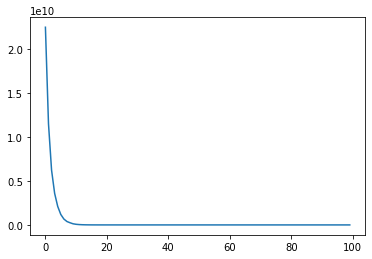

In [104]:
plt.plot(e)
plt.show()

## Questions asked in the document for deep learning:

### 1. How you will split the data for training, validation & testing?

The data will be split across latitudes as change in latitude causes change in temperature & precipitation. Then based upon latitudes we will get two tensors 
       
       a. t2m : (31,1801,3600)
       b. swvl1: (31,1801,3600)
We will merge both the tensors and we will get (31,3602,3600) this will be our X that we will input in our network on daily basis. 

### 2. Implementations for data loading, data transformations & inverse transformation

Did it on initial part of the notebook


### 3. Choice of Model architecture

As of now I used a basic feed forward neural network just to test whether there is scope of reducing the error and yes we can see that error is being reduced. What else we can do is we can use Sequential Neural Networks such as LSTM or Bi Directional RNN because our data has different metrics according to Latitudes & Longitudes so there could be some continuity in the data.

### 4. Obtaining and Fine-tuning a pre-trained model if used

I did not fine tuned much I know it is an important step but as I was doing it on a CPU I just have shown the scope of training this on geo-Data

### 5. Function descriptions and definitions for model training, testing and inference. 

I could not understand the question

### 6. Your choice of activation function, loss function and error metrics. 

I used TanH as it does not cause much gradient vanishing and it also helps in keeping the data small and helps not doing gradient overshoot. I kept output layer linear because I already reduced numbers in hidden layer using TanH so output is going to be in range of precipitation. And yes it can be improved normalizing Precipitation values and using Sigmoid or TanH on output layer too.

### 7. Implementation techniques that help improve the efficiency of model training and dataloading. 

1. Implement the model on a GPU
2. Use PyTorch Tensors
3. Keep Batch Size significantly decent not too much
4. Don't add layers unnecessarily rather work on activation functions, training algorithm & data preprocessing

### 8. How you will avoid overfitting (and implementation of solution). 

Alhough there are less chances of overfitting in above model because it is very naive. But if it happens we can use dropout or can add variance in the data. But as we've already filled NaN values in data so it has already added some impurities so there are less chances of overfitting.
### 9. What do you use for visualising model training and performance? 

As it is prediction so we can't get a good way of seeing accuracy so we will have to rely on the error that is being reduced. Also while checking error we need to check the ratio of maximum value of Target Variable & the Error this will help us know what is the ratio of error with respect to maximum error possible.


### 10. What factors do you think might restrict the model from achieving a high accuracy?

1. A lot of missing values
2. Less data
3. Less correlation in data
4. Misinterpretation of data and not using proper model. Maybe the data is timeseries and you use normal model then accuracy will be low
5. Not using proper activation functions and to know which activation functions to use you need to analyse the data in a proper manner
6. Not doing proper feature engineering can also cause less accuracy